In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv('rainfall.csv')
df.head()


,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4


In [45]:
df.tail()

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
2634,Tashiyangtse,2021,8,25.306452,19.322581,86.129032,0.283226,192.3
2635,Tashiyangtse,2021,9,27.500000,16.816667,78.966667,0.283000,139.8
2636,Tashiyangtse,2021,10,24.951613,12.790323,78.838710,0.286129,94.6
2637,Tashiyangtse,2021,11,20.050000,6.266667,75.666667,0.328333,9.0
2638,Tashiyangtse,2021,12,16.854839,1.935484,74.483871,0.321290,21.0


In [46]:
df.shape

(2639, 8)

In [47]:
df.columns

Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'Wind Speed',
       'Rainfall'],
      dtype='object')

In [48]:
df.dtypes

location       object
Year            int64
Month           int64
Tmax          float64
Tmin          float64
RH            float64
Wind Speed    float64
Rainfall      float64
dtype: object

In [49]:
df.count()

location      2639
Year          2639
Month         2639
Tmax          2638
Tmin          2638
RH            2637
Wind Speed    2632
Rainfall      2638
dtype: int64

In [50]:
df.isnull().sum()

location      0
Year          0
Month         0
Tmax          1
Tmin          1
RH            2
Wind Speed    7
Rainfall      1
dtype: int64

In [51]:
df.dtypes

location       object
Year            int64
Month           int64
Tmax          float64
Tmin          float64
RH            float64
Wind Speed    float64
Rainfall      float64
dtype: object

In [52]:

df.rename(columns={'Wind Speed':'WindSpeed'},inplace=True)

### Visualization


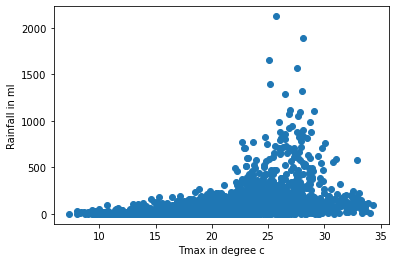

In [53]:
#Tmax Vs. Rainfall
x = df.Tmax
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmax in degree c')
plt.ylabel('Rainfall in ml')
plt.show()

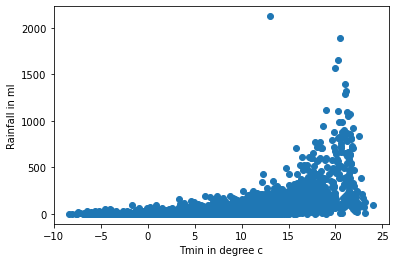

In [54]:
#Tmin Vs. Rainfall
x = df.Tmin
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmin in degree c')
plt.ylabel('Rainfall in ml')
plt.show()

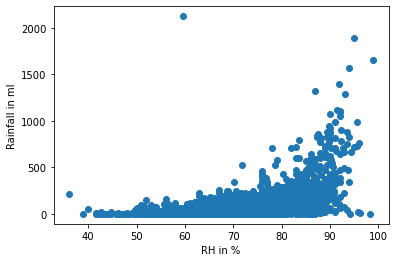

In [55]:
#RH Vs. Rainfall
x = df.RH
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('RH in %')
plt.ylabel('Rainfall in ml')
plt.show()

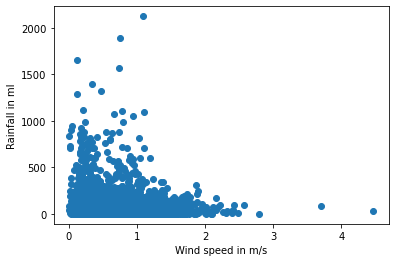

In [56]:
# Wind speed  Vs. Rainfall
x = df.WindSpeed
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Wind speed in m/s')
plt.ylabel('Rainfall in ml')
plt.show()

### Feature Engineering

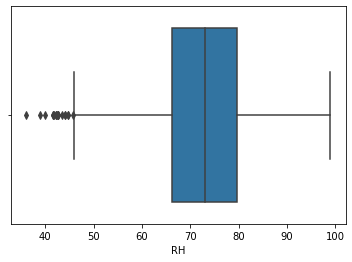

In [57]:
#Finding and removing outliers from rh
sns.boxplot(x=df['RH'])
plt.show()

In [58]:
Q1 = df.RH.quantile(0.25)
Q3 = df.RH.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [59]:
df3=df[(df.RH> lowerlimit)  & (df.RH < upperlimit)]
df3.shape

(2619, 8)

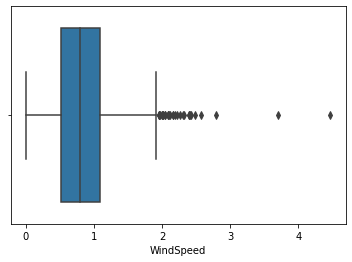

In [60]:
#Finding and removing outliers from Windspeed
sns.boxplot(x=df3['WindSpeed'])
plt.show()

In [61]:
Q1 = df3.WindSpeed.quantile(0.25)
Q3 = df3.WindSpeed.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [62]:
df4=df3[(df3.WindSpeed> lowerlimit)  & (df3.WindSpeed < upperlimit)]
df4.shape

(2583, 8)

In [63]:
df4.dropna(subset='Rainfall',inplace=True)

/tmp/ipykernel_6157/4030771574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(subset='Rainfall',inplace=True)


In [64]:
X=df4.drop('Rainfall',axis=1)
y=df4['Rainfall']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20, shuffle=True,random_state=50)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [67]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Year', 'Month', 'Tmax', 'Tmin', 'RH', 'WindSpeed'], dtype='object')
Index(['location'], dtype='object')


In [68]:
numeric_index = [X.columns.get_loc(col) for col in numeric_cols]
numeric_index

[1, 2, 3, 4, 5, 6]

In [69]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

[0]

In [70]:
#Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean')), #Handline numeric missing value with median
    ('scaler',StandardScaler()) #Normalize the data
] )


#Building the Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('le',OneHotEncoder(handle_unknown='ignore'))
])

In [71]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('num',numeric_transformer,numeric_index),
                ('label',categorical_transformer,categorical_index)]
)

In [72]:
from sklearn import svm
model = svm.SVR(kernel='rbf',C=5000,gamma='scale')

In [73]:
#from sklearn.ensemble import RandomForestRegressor
#model= RandomForestRegressor(n_estimators=100,max_depth=10)

In [74]:
#Assemble the individual blocks to form the main pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
('model', model)
])

In [75]:
type(X_train)

pandas.core.frame.DataFrame

In [76]:
from sklearn import set_config
set_config(display='diagram')
#fit data
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6]),
                                                 ('label',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('le',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0])])),
                ('model', SVR(C=5000))])

In [77]:
from joblib import load, dump
dump(my_pipeline,'model.joblib')

['model.joblib']

In [78]:
 #Import all the metrics for validation and evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns

In [79]:
X_train.shape

(2065, 7)

In [80]:
y_test.shape

(517,)

In [81]:
my_pipeline.score(X_train,y_train)

0.7799814784648382

In [82]:
my_pipeline.score(X_test,y_test)

0.7621468427956353

In [83]:
y_pred=my_pipeline.predict(X_test)

In [84]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))                                                                                                                                          

root_mean_squared error of is== 78.75203990288867
